## CAPSTONE PROJECT - REGRESSION

### Nama : Novi Amaliah  <br> ID : ds001

### IMPORT PACKAGES

In [1]:
import pandas as pd
import numpy as np
import warnings
from scipy.stats import shapiro
from sklearn import metrics

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

### LOAD DATASET

In [2]:
data = pd.read_csv('D:/Data Scientist/Proyek mandiri/Superstore_.csv', encoding="windows-1252" ,sep=";")
data.head(5)

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,419.136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.582
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,68.714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9.575.775,5,0.45,-383.031
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.20,25.164


### PROBLEM STATEMENT

Bagaimana cara mengembangkan revenue optimization yang efektif untuk perusahaan Superstore? dan apa saja wawasan bisnis yang dapat digunakan untuk  meningkatkan kinerja perusahaan Superstore?

#### Metadata Superstore.csv
- Index : Indeks baris
- ID_pesanan : ID pesanan Unik untuk setiap Pelanggan
- Tanggal_pesan : Tanggal pemesanan produk
- Tanggal_kirim : Tanggal pengiriman produk
- Metode_pengiriman : Mode pengiriman ditentukan oleh Pelanggan
- ID_pelanggan : ID unik untuk mengidentifikasi setiap Pelanggan
- Nama_pelanggan : Nama Pelanggan
- Segmen_pelanggan : Segmen tempat pelanggan berada
- Kota : Kota tempat tinggal Pelanggan
- Negara : Negara tempat tinggal pelanggan
- Kode_pos : Kode pos setiap Pelanggan
- Wilayah : Wilayah tempat Pelanggan berada
- ID_produk : ID unik Produk
- Kategori : Kategori produk yang dipesan
- Sub_kategori : Sub-kategori produk yang dipesan
- Nama_produk : Nama Produk
- Penjualan : Harga x Kuantitas
- Kuantitas : Kuantitas Produk
- Discount : Diskon yang disediakan
- Untung : Keuntungan penjualan


### EDA

In [3]:
#Informasi tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              9994 non-null   int64  
 1   ID_pesanan         9994 non-null   object 
 2   Tanggal_pesan      9994 non-null   object 
 3   Tanggal_kirim      9994 non-null   object 
 4   Metode_pengiriman  9994 non-null   object 
 5   ID_pelanggan       9994 non-null   object 
 6   Nama_pelanggan     9994 non-null   object 
 7   Segmen_pelanggan   9994 non-null   object 
 8   Kota               9994 non-null   object 
 9   Negara             9994 non-null   object 
 10  Kode_pos           9994 non-null   int64  
 11  Wilayah            9994 non-null   object 
 12  ID_produk          9994 non-null   object 
 13  Kategori           9994 non-null   object 
 14  Sub_kategori       9994 non-null   object 
 15  Nama_produk        9994 non-null   object 
 16  Penjualan          9994 

#### Ubah data type pada beberapa variabel 

In [4]:
#Mengubah datatype variabel Tanggal_pesan dan Tanggal_kirim

data["Tanggal_pesan"] = pd.to_datetime(data["Tanggal_pesan"])
data["Tanggal_kirim"] = pd.to_datetime(data["Tanggal_kirim"])

In [5]:
#Mengubah datatype variabel Penjualan dan Untung
def convert_to_float(value):
    try :
        return float(value.replace(".", ""))
    except ValueError :
        return None

data["Penjualan"] = data["Penjualan"].apply(convert_to_float)
data["Untung"] = data["Untung"].apply(convert_to_float)

In [6]:
#Menguabah datatype variabel Kode_pos dan Index
data["Kode_pos"] = data["Kode_pos"].astype(str)
data["Index"] = data["Index"].astype(str)

In [7]:
#Cek kembali data type yang sudah diubah
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Index              9994 non-null   object        
 1   ID_pesanan         9994 non-null   object        
 2   Tanggal_pesan      9994 non-null   datetime64[ns]
 3   Tanggal_kirim      9994 non-null   datetime64[ns]
 4   Metode_pengiriman  9994 non-null   object        
 5   ID_pelanggan       9994 non-null   object        
 6   Nama_pelanggan     9994 non-null   object        
 7   Segmen_pelanggan   9994 non-null   object        
 8   Kota               9994 non-null   object        
 9   Negara             9994 non-null   object        
 10  Kode_pos           9994 non-null   object        
 11  Wilayah            9994 non-null   object        
 12  ID_produk          9994 non-null   object        
 13  Kategori           9994 non-null   object        
 14  Sub_kate

In [8]:
data.describe()

,Tanggal_pesan,Tanggal_kirim,Penjualan,Kuantitas,Discount,Untung
count,9994,9994,9.994000e+03,9994.000000,9994.000000,9.994000e+03
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,1.132271e+05,3.789574,0.156203,1.800957e+05
min,2014-01-03 00:00:00,2014-01-07 00:00:00,3.000000e+00,1.000000,0.000000,-3.839990e+07
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,2.516000e+03,2.000000,0.000000,2.245000e+03
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,1.108800e+04,3.000000,0.200000,3.630900e+04
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,5.399175e+04,5.000000,0.200000,1.509840e+05
max,2017-12-30 00:00:00,2018-01-05 00:00:00,2.396266e+07,14.000000,0.800000,6.719981e+07
std,NaN,NaN,5.186212e+05,2.225110,0.206452,1.722971e+06


#### Bagaimana sebaran wilayah customer perusahaan?

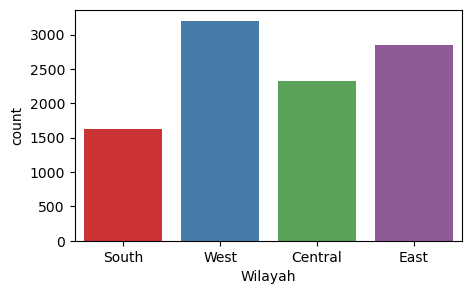

In [9]:
#Visualisasi wilayah customer
plt.figure(figsize=(5,3))
sns.countplot(x=data['Wilayah'], palette='Set1')
plt.savefig("Wilayah_customer")
plt.show()

Karena Superstore merupakan perusahaan retail di Amerika maka sebaran wilayahnya ada 4 yaitu South, West, Central, East. Sebaran customer bervariasi antar wilayah dengan wilayah West Amerika memiliki konsentrasi customer tertinggi.

#### Bagaimana sebaran Negara Customer Perusahaan
5 negara teratas

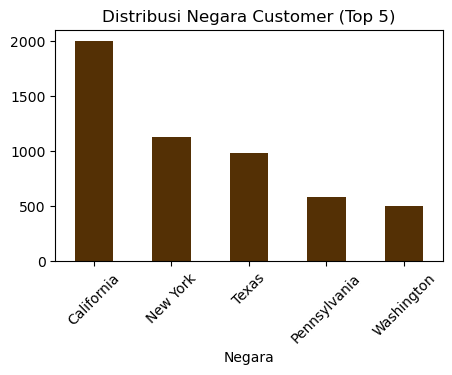

In [10]:
# 5 Negara teratas
top_negara = data["Negara"].value_counts().head(5)

#Visualisasi sebaran top 5 negara customer
plt.figure(figsize=(5, 3))  
top_negara.plot(kind="bar", cmap="BrBG")
plt.xticks(rotation=45)
plt.title('Distribusi Negara Customer (Top 5)')  
plt.savefig("Negara_customer")
plt.show()

Dari visualisasi didapat bahwa negara California, New York, Texas, Pennsylvania dan Washington merupakan 5 basis customer teratas bagi perusahaan Superstore

5 Negara dengan jumlah customer sedikit

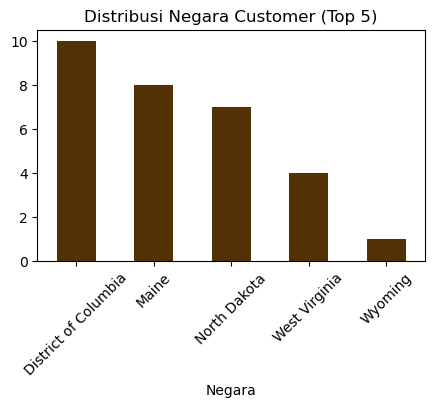

In [11]:
# 5 Negara dengan jumlah customer sedikit
negara_sedikit_cust = data["Negara"].value_counts().tail(5)

#Visualisasi sebaran top 5 negara customer
plt.figure(figsize=(5, 3))  
negara_sedikit_cust.plot(kind="bar", cmap="BrBG")
plt.xticks(rotation=45)
plt.title('Distribusi Negara Customer (Top 5)')
plt.savefig("Negara_customer2")
plt.show()

#### Metode pengiriman yang banyak dipakai oleh customer berdasarkan wilayah

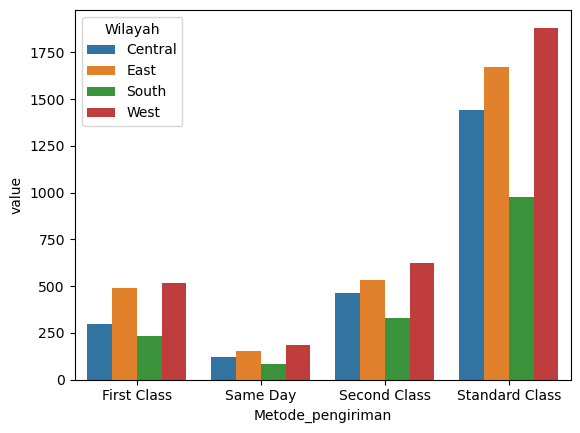

In [12]:
Ekspedisi = pd.crosstab(data["Metode_pengiriman"], data["Wilayah"])

# Buat hasil crosstab menjadi dataframe
stacked = Ekspedisi.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.Metode_pengiriman, y=stacked.value, hue=stacked.Wilayah)
plt.savefig("ekspedisi")
plt.show()

Dari visualisasi di atas dapat diketahui bahwa Metode pengiriman Standard Class paling banyak diminati oleh customer di semua wilayah dan Metode pengiriman Same Day kurang diminati oleh customer.

#### Bagaimana segementasi pelanggan di Superstore?

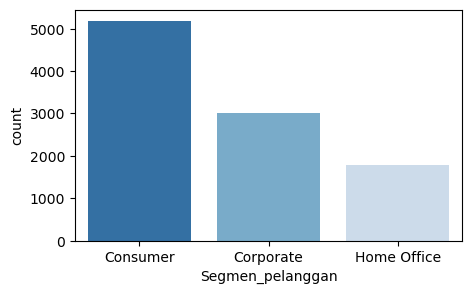

In [13]:
#Visualisasi segmen pelanggan
plt.figure(figsize=(5,3))
sns.countplot(x=data['Segmen_pelanggan'], palette='Blues_r')
plt.savefig("segment_pelanggan")
plt.show()

Dari hasil di atas diketahui bahwa ada 3 segmentasi pelanggan pada Superstore yaitu :
- Consumer : individu yang membeli produk untuk dipakai sendiri / pembeli idnividu.
- Corporate : Biasanya mengacu pada organisasi / bisnis yang membeli suatu produk.
- Home Office : individu yang membeli produk untuk kebutuhan bisnis rumahannya.

Jumlah segmen pelanggan "Consumer" lebih banyak dari pada segmen pelanggan "Corporate" dan "Home Office". Hal tersebut menunjukkan bahwa Superstore memiliki basis pelanggan pembeli individu yang lebih besar.

#### Kategori produk apa saja yang dijual perusahaan Superstore?

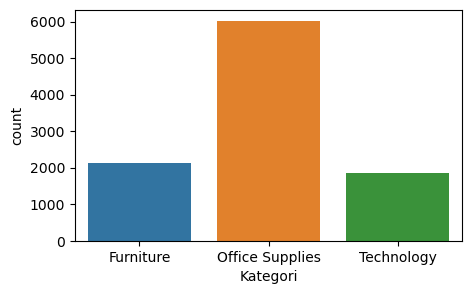

In [14]:
#Visualisasi Kategori produk
plt.figure(figsize=(5, 3))
sns.countplot(x=data['Kategori'], palette='tab10')
plt.savefig("kategori_produk")
plt.show()

Perusahaan Superstore menjual produk kategori Furniture, Office Supplies, dan Technology. Dengan jumlah produk yang paling banyak yaitu Office Supplies

#### Bagaimana dengan Sub-kategori produk perusahaan Superstore?

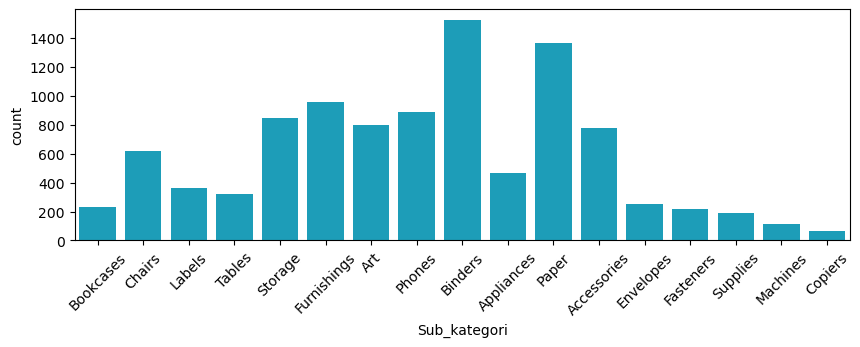

In [15]:
#Visualisasi Sub-kategori produk
plt.figure(figsize=(10, 3))
sns.countplot(x=data['Sub_kategori'], color="#03AED2")
plt.xticks(rotation=45)
plt.savefig("subkategori")
plt.show()

Barang yang paling banyak jumlahnya berdasarkan  Sub_kategori yaitu Blinders dan Paper.

#### Bagaimana penjualan berdasarkan wilayah

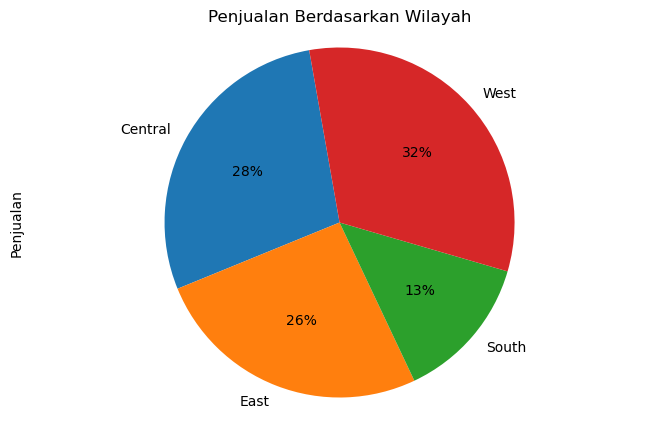

In [16]:
# penjualan per wilayah
penjualan_per_wilayah = data.groupby("Wilayah")["Penjualan"].sum()

plt.figure(figsize=(8,5))
penjualan_per_wilayah.plot(kind="pie", autopct="%1.0f%%", startangle=100)
plt.title("Penjualan Berdasarkan Wilayah")
plt.axis("equal")
plt.savefig("penjualan_wilayah")
plt.show()

Dari pie chart diatas didapat bahwa wilayah Amerika west memiliki distribusi penjualan terbesar (32%) disusul wilayah Central (28%), East (26%) dan South (13%)

#### Bagaimana keuntungan berdasarkan wilayah

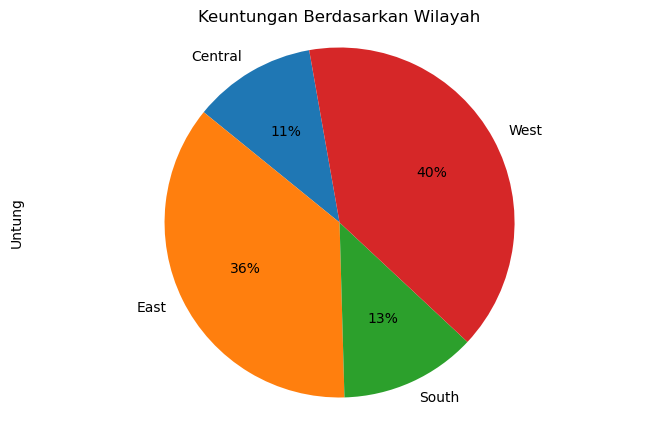

In [17]:
# keuntungan per wilayah
keuntungan_per_wilayah = data.groupby("Wilayah")["Untung"].sum()

plt.figure(figsize=(8, 5))
keuntungan_per_wilayah.plot(kind="pie", autopct="%1.0f%%", startangle=100)
plt.title("Keuntungan Berdasarkan Wilayah")
plt.axis("equal")
plt.savefig("keuntungan_wilayah")
plt.show()

wilayah Amerika West dan East menyumbang keuntungan yang banyak pada perusahaan Superstore.

#### Bagaimana penjualan pada Superstore berdasarkan kategori produknya?

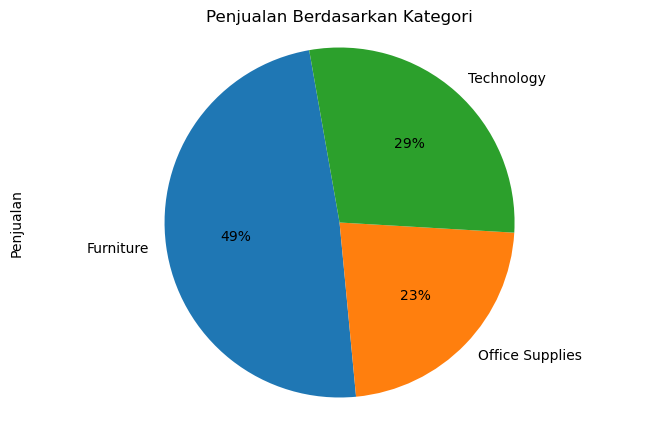

In [18]:
penjualan_per_kategori = data.groupby("Kategori")["Penjualan"].sum()

plt.figure(figsize=(8, 5))
penjualan_per_kategori.plot(kind="pie", autopct="%1.0f%%", startangle=100)
plt.title("Penjualan Berdasarkan Kategori")
plt.axis("equal")
plt.savefig("penjualan_kategori")
plt.show()

Berdasarkan kategorinya, penjualan yang paling banyak yaitu kategori Furniture dengan 49%, disusul dengan kategori Tecnology (29%) dan Office Supplies (23%).

#### Bagaimana keuntungan berdasarkan Kategori produknya?

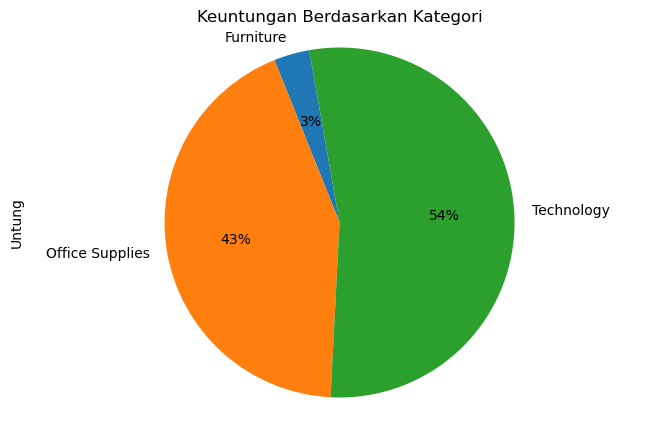

In [19]:
keuntungan_per_kategori = data.groupby("Kategori")["Untung"].sum()

plt.figure(figsize=(8, 5))
keuntungan_per_kategori.plot(kind="pie", autopct="%1.0f%%", startangle=100)
plt.title("Keuntungan Berdasarkan Kategori")
plt.axis("equal")
plt.savefig("keuntungan_kategori")
plt.show()

Kategori Technology memiliki keuntungan yang sangat besar sampai 58%. Lalu disusul dengan Office Supplies (43%).
Kategori Furniture mempunyai total penjualan yang paling banyak tetapi memiliki keuntungan yang sangat sedikit (3%).

#### Kategori produk berdasarkan segment pelanggan?

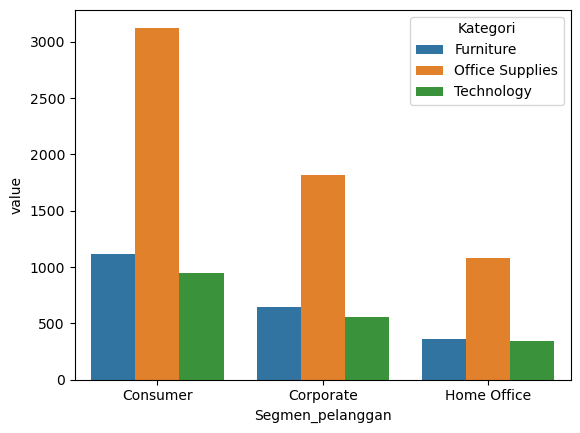

In [20]:
kategori_by_cust = pd.crosstab(data["Segmen_pelanggan"], data["Kategori"])
kategori_by_cust

# Buat hasil crosstab menjadi dataframe
stacked = kategori_by_cust.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.Segmen_pelanggan, y=stacked.value, hue=stacked.Kategori)
plt.savefig("kategoriprdk_segment")
plt.show()

Dari hasil di atas diketahui bahwa kategori Office Supplies paling banyak dibeli oleh semua Segmen pelanggan.

#### Kategori produk berdasarkan wilayah

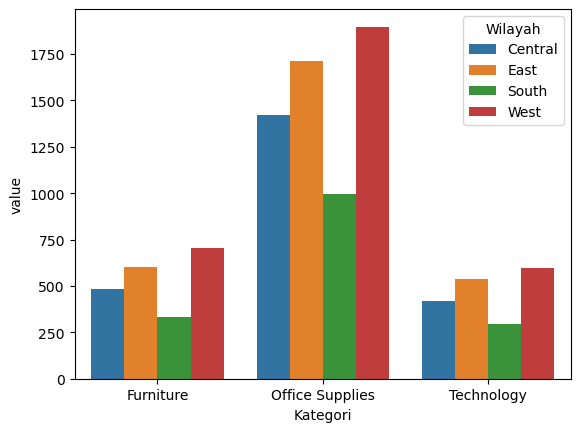

In [21]:
produk_by_wilayah = pd.crosstab(data["Kategori"], data["Wilayah"])

# Buat hasil crosstab menjadi dataframe
stacked = produk_by_wilayah.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.Kategori, y=stacked.value, hue=stacked.Wilayah)
plt.savefig("kategoriprdk_wilayah")
plt.show()

Wah ternyata Kategori Office Supplies juga paling banyak diminati oleh customer di semua wilayah.

#### 5 Nama produk dengan kuantitas terbanyak

In [22]:
jml_produk = data.groupby("Nama_produk")["Kuantitas"].sum()
sortir_data = jml_produk.sort_values(ascending=False)

top_produk = sortir_data.index[:5]
print("5 Produk paling banyak :")
for produk in top_produk:
    print(produk)

5 Produk paling banyak :
Staples
Staple envelope
Easy-staple paper
Staples in misc. colors
KI Adjustable-Height Table


#### Customer yang paling banyak menghabiskan uang untuk membeli produk

In [23]:
customer = data.groupby("Nama_pelanggan")["Penjualan"].sum()
sortir_data = customer.sort_values(ascending=False)

top_customer = sortir_data.index[:10]
print("10 Customer yang banyak menghabiskan uang untuk membeli produk di Superstore:")
for nama_customer in top_customer:
    uang = customer[nama_customer]
    print(f"{nama_customer} : ${uang:,.2f}")

10 Customer yang banyak menghabiskan uang untuk membeli produk di Superstore:
Anna Gayman : $24,906,012.00
Craig Molinari : $14,798,847.00
Amy Hunt : $13,672,749.00
Patrick O'Brill : $12,682,247.00
Emily Phan : $11,809,730.00
Tom Ashbrook : $11,388,497.00
Harry Marie : $10,803,077.00
Sean O'Donnell : $10,279,823.00
Craig Carreira : $10,045,850.00
Christopher Conant : $9,361,086.00


#### Seberapa cepat sih perusahaan Superstore memproses pesanan customer?

In [24]:
proses_pengemasan = (data["Tanggal_kirim"] - data["Tanggal_pesan"])
print("Rata-rata proses barang dikemas :", proses_pengemasan.mean())

Rata-rata proses barang dikemas : 3 days 22:59:46.311787072


Perusahaan Superstore mungkin perlu mempercepat waktu pemrosesan pesanan customer agar customer mendapat experience yang lebih baik dengan begitu kepuasan customer akan meningkat.

#### Berapa penjualan tahunan perusahaan Superstore?

In [25]:
#Ekstrak tahun dari ID pesanan
data["Tahun"] = data["ID_pesanan"].str[3:7]

#Hitung penjualan tahunan
Penjualan_tahunan = data.groupby("Tahun")["Penjualan"].sum()
Penjualan_tahunan

Tahun
2014    216122757.0
2015    250505855.0
2016    308563338.0
2017    356399770.0
Name: Penjualan, dtype: float64

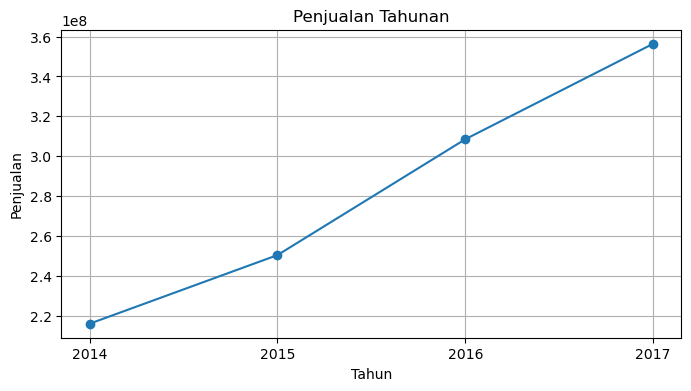

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(Penjualan_tahunan, marker='o', linestyle='-')
plt.xlabel('Tahun')
plt.ylabel('Penjualan')
plt.title('Penjualan Tahunan')
plt.grid(True)
plt.savefig("penjualan_tahunan")
plt.show()

Visualisasi tersebut menunjukkan bahwa penjualan perusahaan terus meningkat dari tahun 2014 hingga tahun 2017. Hal ini merupakan hal positif bagi perusahaan Superstore

#### Berapa keuntungan yang didapat perusahaan Superstore tiap tahun?

In [27]:
#Hitung keuntungan tahunan
Keuntungan_tahunan = data.groupby("Tahun")["Untung"].sum()
Keuntungan_tahunan

Tahun
2014    353421757.0
2015    312767714.0
2016    491666273.0
2017    642020794.0
Name: Untung, dtype: float64

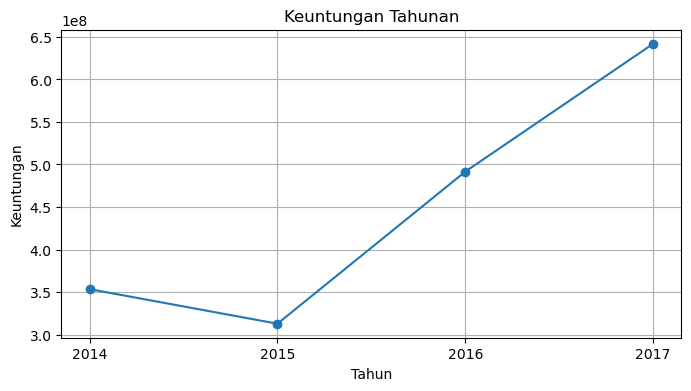

In [28]:
plt.figure(figsize=(8, 4))
plt.plot(Keuntungan_tahunan, marker='o', linestyle='-')
plt.xlabel('Tahun')
plt.ylabel('Keuntungan')
plt.title('Keuntungan Tahunan')
plt.grid(True)
plt.savefig("keuntungan_tahunan")
plt.show()

Visualisasi tersebut menunjukkan bahwa keuntungan perusahaan menurun pada tahun 2015 tetapi pada tahun 2016 sampai 2017 meningkat sangat pesat. ini merupakan hal positif bagi perusahaan Superstore

#### Tren penjualan kategori produk tiap tahun

In [29]:
tren_penjualan = data.groupby(["Tahun", "Kategori"])["Penjualan"].sum().reset_index()
tren_penjualan

,Tahun,Kategori,Penjualan
0,2014,Furniture,88529766.0
1,2014,Office Supplies,51662599.0
2,2014,Technology,75930392.0
3,2015,Furniture,146690737.0
4,2015,Office Supplies,51528416.0
5,2015,Technology,52286702.0
6,2016,Furniture,158656829.0
7,2016,Office Supplies,67751132.0
8,2016,Technology,82155377.0
9,2017,Furniture,157513806.0


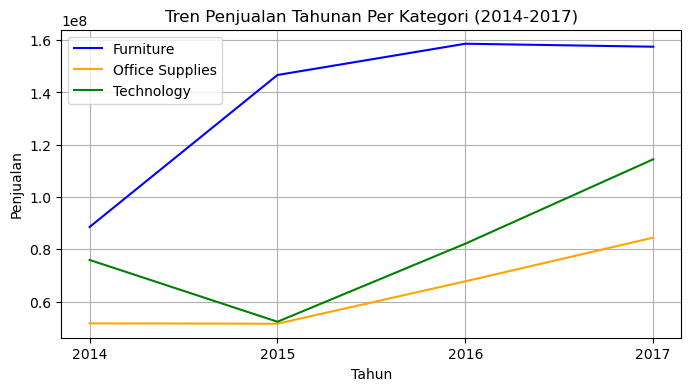

In [30]:
# warna setiap kategori
colors = ["blue", "orange", "green"]

# buat grafik
plt.figure(figsize=(8, 4))
for i, category in enumerate(tren_penjualan["Kategori"].unique()):
    plt.plot(tren_penjualan[tren_penjualan["Kategori"] == category]["Tahun"], tren_penjualan[tren_penjualan["Kategori"] == category]["Penjualan"], label=category, color=colors[i])

plt.xlabel("Tahun")
plt.ylabel("Penjualan")
plt.title("Tren Penjualan Tahunan Per Kategori (2014-2017)")
plt.grid(True)
plt.legend()
plt.savefig("trenpenjualan_produk_tahunan")
plt.show()

Dari grafik diatas diketahui bahwa penjualan tahunan pada kategori Furniture menunjukkan peningkatan yang stabil dari tahun 2014 ke tahun 2016, dan sedikit mengalami penurunan pada tahun 2017. kategori Furniture juga secara konsisten memiliki penjualan tertinggi di antara ketiga kategori sepanjang tahun.

kategori Office Supplies menunjukkan pertumbuhan dari tahun 2014 hingga 2016, diikuti oleh lonjakan signifikan pada tahun 2017.
Memiliki penjualan terendah pada tahun 2014 namun mengalami pertumbuhan paling substansial selama periode tersebut.

Kategori Technology menunjukkan peningkatan yang konsisten sepanjang tahun, dengan tingkat pertumbuhan tertinggi di antara kategori-kategori tersebut. Dimulai dengan penjualan tertinggi kedua pada tahun 2014 namun melampaui Perlengkapan Kantor pada tahun 2016 dan 2017.

### DATA PRE-PROCESSING

#### Missing Value

In [31]:
#Check missing value
data.isna().sum()

Index                0
ID_pesanan           0
Tanggal_pesan        0
Tanggal_kirim        0
Metode_pengiriman    0
ID_pelanggan         0
Nama_pelanggan       0
Segmen_pelanggan     0
Kota                 0
Negara               0
Kode_pos             0
Wilayah              0
ID_produk            0
Kategori             0
Sub_kategori         0
Nama_produk          0
Penjualan            0
Kuantitas            0
Discount             0
Untung               0
Tahun                0
dtype: int64

Tidak ada missing value pada data

#### Duplicate Data

In [32]:
#Cek apakah ada duplicate data
data.duplicated().sum()

0

Tidak ada duplicate data

#### Outlier

Text(0.5, 0, 'data')

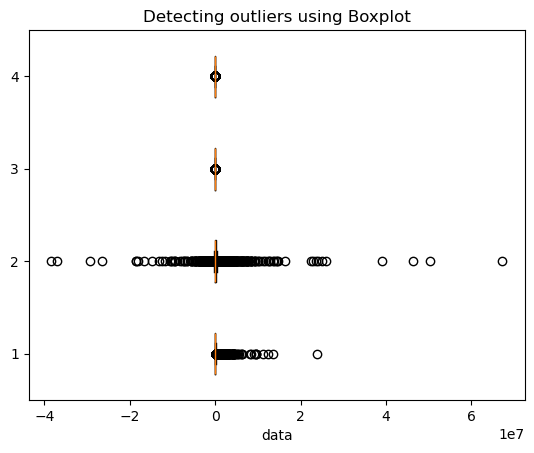

In [33]:
# Deteksi dengan boxplot
df = data[['Penjualan', 'Untung', 'Kuantitas', 'Discount']]
plt.boxplot(df, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('data')

Terdapat outliers pada variabel Penjualan dan Untung, kita lihat berapa banyak outlier pada 2 variabel tersebut.

In [34]:
# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [35]:
# Deteksi outlier dengan IQR pada variabel Penjualan
outliers = detect_outliers_iqr(list(data.Penjualan))
print("Banyaknya outlier Penjualan: ",len(outliers))

persentase_outliers = (len(outliers) / len(data["Penjualan"])) * 100
print("Persentase outlier Penjualan: {:.2f}%".format(persentase_outliers))

Banyaknya outlier Penjualan:  1487
Persentase outlier Penjualan: 14.88%


In [36]:
# Deteksi outlier dengan IQR pada variabel Untung
outliers = detect_outliers_iqr(list(data.Untung))
print("Banyaknya outlier Untung: ",len(outliers))

persentase_outliers = (len(outliers) / len(data["Untung"])) * 100
print("Persentase outlier Untung: {:.2f}%".format(persentase_outliers))

Banyaknya outlier Untung:  1883
Persentase outlier Untung: 18.84%


Outliernya tidak akan diganti dengan mean ataupun dihapus.

#### One Hot encoding

In [37]:
category = ["Metode_pengiriman", "Segmen_pelanggan", "Wilayah", "Kategori", "Sub_kategori"]
data_cat = data[category]
data_cat.head(5)

,Metode_pengiriman,Segmen_pelanggan,Wilayah,Kategori,Sub_kategori
0,Second Class,Consumer,South,Furniture,Bookcases
1,Second Class,Consumer,South,Furniture,Chairs
2,Second Class,Corporate,West,Office Supplies,Labels
3,Standard Class,Consumer,South,Furniture,Tables
4,Standard Class,Consumer,South,Office Supplies,Storage


In [38]:
ohe = OneHotEncoder(sparse_output=False)
one_hot = ohe.fit_transform(data_cat)
one_hot_data = pd.DataFrame(one_hot, columns=ohe.get_feature_names_out(category))

#Gabung dataframe asli dengan ohe dataframe
df = pd.concat([data, one_hot_data], axis=1)
df = df.drop(category, axis=1)
df.head(5)

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,ID_pelanggan,Nama_pelanggan,Kota,Negara,Kode_pos,ID_produk,...,Sub_kategori_Envelopes,Sub_kategori_Fasteners,Sub_kategori_Furnishings,Sub_kategori_Labels,Sub_kategori_Machines,Sub_kategori_Paper,Sub_kategori_Phones,Sub_kategori_Storage,Sub_kategori_Supplies,Sub_kategori_Tables
0,1,CA-2016-152156,2016-11-08,2016-11-11,CG-12520,Claire Gute,Henderson,Kentucky,42420,FUR-BO-10001798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,CA-2016-152156,2016-11-08,2016-11-11,CG-12520,Claire Gute,Henderson,Kentucky,42420,FUR-CH-10000454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,CA-2016-138688,2016-06-12,2016-06-16,DV-13045,Darrin Van Huff,Los Angeles,California,90036,OFF-LA-10000240,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,US-2015-108966,2015-10-11,2015-10-18,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311,FUR-TA-10000577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,US-2015-108966,2015-10-11,2015-10-18,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311,OFF-ST-10000760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Index                             9994 non-null   object        
 1   ID_pesanan                        9994 non-null   object        
 2   Tanggal_pesan                     9994 non-null   datetime64[ns]
 3   Tanggal_kirim                     9994 non-null   datetime64[ns]
 4   ID_pelanggan                      9994 non-null   object        
 5   Nama_pelanggan                    9994 non-null   object        
 6   Kota                              9994 non-null   object        
 7   Negara                            9994 non-null   object        
 8   Kode_pos                          9994 non-null   object        
 9   ID_produk                         9994 non-null   object        
 10  Nama_produk                       9994 non-null 

#### Correlation

In [40]:
#Hapus terlebih dahulu variabel dengan dtype obejct
object_columns = df.select_dtypes(include=['object', 'datetime64[ns]']).columns
df.drop(object_columns, axis=1, inplace=True)

<Axes: >

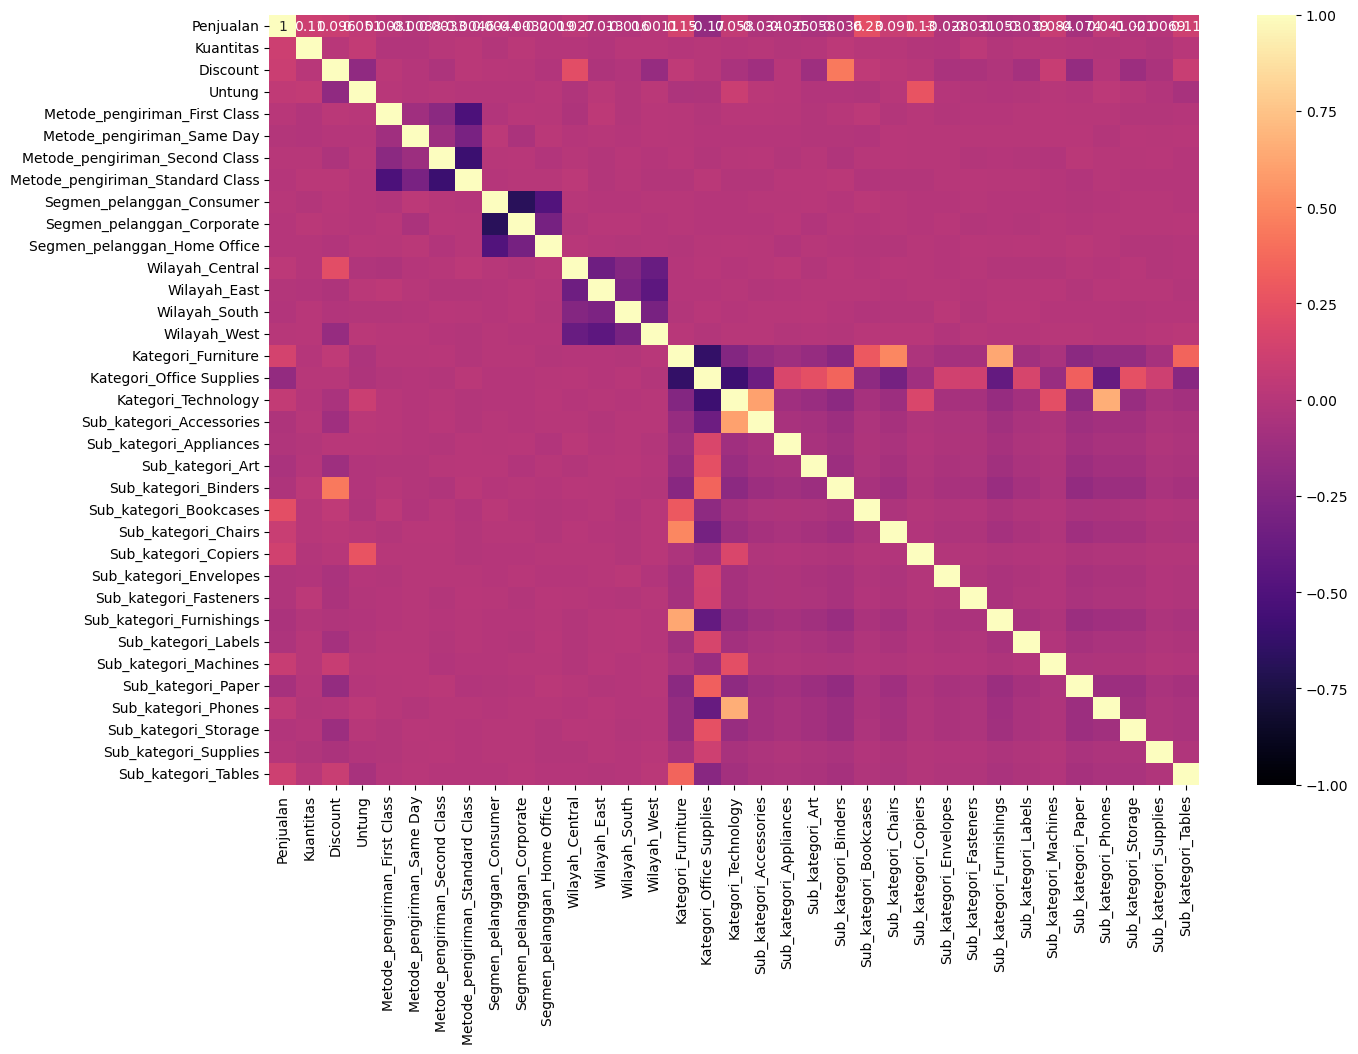

In [41]:
#Using Pearson Correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, cmap="magma", annot=True)

In [42]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df.corr()["Penjualan"].sort_values()[22:]
korelasi

Wilayah_Central           0.026647
Sub_kategori_Phones       0.041123
Untung                    0.050876
Kategori_Technology       0.057504
Sub_kategori_Machines     0.083948
Sub_kategori_Chairs       0.091096
Discount                  0.096191
Kuantitas                 0.107960
Sub_kategori_Tables       0.111297
Sub_kategori_Copiers      0.131683
Kategori_Furniture        0.146866
Sub_kategori_Bookcases    0.228369
Penjualan                 1.000000
Name: Penjualan, dtype: float64

Dari hasil korelasi diatas diketahui bahwa variabel Wilayah_Central, Sub_kategori_Phones, Untung, Kategori_Technology, Sub_kategori_Machines, Sub_kategori_Chairs, Kuantitas, Discount, Sub_kategori_Tables, Sub_kategori_Copiers, Kategori_Furniture, Sub_kategori_Bookcases
memiliki korelasi dengan variabel dependen Penjualan. Maka dari itu saya akan menggunakan variabel tersebut untuk dijadikan variabel independen.

Variabel yang tidak digunakan akan dihapus

#### Menghapus variabel

In [43]:
#Hapus variabel yang tidak diperlukan
keep_var = ['Wilayah_Central', 'Sub_kategori_Phones', 'Untung', 'Kategori_Technology', 'Sub_kategori_Machines', 'Sub_kategori_Chairs', 'Kuantitas', 'Discount', 'Sub_kategori_Tables', 'Sub_kategori_Copiers', 'Kategori_Furniture', 'Sub_kategori_Bookcases', 'Penjualan']
df= df.loc[:, keep_var]
df

,Wilayah_Central,Sub_kategori_Phones,Untung,Kategori_Technology,Sub_kategori_Machines,Sub_kategori_Chairs,Kuantitas,Discount,Sub_kategori_Tables,Sub_kategori_Copiers,Kategori_Furniture,Sub_kategori_Bookcases,Penjualan
0,0.0,0.0,419136.0,0.0,0.0,0.0,2,0.00,0.0,0.0,1.0,1.0,26196.0
1,0.0,0.0,219582.0,0.0,0.0,1.0,3,0.00,0.0,0.0,1.0,0.0,73194.0
2,0.0,0.0,68714.0,0.0,0.0,0.0,2,0.00,0.0,0.0,0.0,0.0,1462.0
3,0.0,0.0,-383031.0,0.0,0.0,0.0,5,0.45,1.0,0.0,1.0,0.0,9575775.0
4,0.0,0.0,25164.0,0.0,0.0,0.0,2,0.20,0.0,0.0,0.0,0.0,22368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0.0,0.0,41028.0,0.0,0.0,0.0,3,0.20,0.0,0.0,1.0,0.0,25248.0
9990,0.0,0.0,156332.0,0.0,0.0,0.0,2,0.00,0.0,0.0,1.0,0.0,9196.0
9991,0.0,1.0,193932.0,1.0,0.0,0.0,2,0.20,0.0,0.0,0.0,0.0,258576.0
9992,0.0,0.0,1332.0,0.0,0.0,0.0,4,0.00,0.0,0.0,0.0,0.0,296.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Wilayah_Central         9994 non-null   float64
 1   Sub_kategori_Phones     9994 non-null   float64
 2   Untung                  9994 non-null   float64
 3   Kategori_Technology     9994 non-null   float64
 4   Sub_kategori_Machines   9994 non-null   float64
 5   Sub_kategori_Chairs     9994 non-null   float64
 6   Kuantitas               9994 non-null   int64  
 7   Discount                9994 non-null   float64
 8   Sub_kategori_Tables     9994 non-null   float64
 9   Sub_kategori_Copiers    9994 non-null   float64
 10  Kategori_Furniture      9994 non-null   float64
 11  Sub_kategori_Bookcases  9994 non-null   float64
 12  Penjualan               9994 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 1015.1 KB


### FEATURE ENGINEERING

#### Buat Variabel Baru

In [45]:
#Buat variabel baru dengan nama Lama_pengiriman
df["Lama_pengemasan"] = proses_pengemasan.dt.days
kolom_baru = ['Lama_pengemasan'] + list(df.columns[:-1])
df = df[kolom_baru]
df

,Lama_pengemasan,Wilayah_Central,Sub_kategori_Phones,Untung,Kategori_Technology,Sub_kategori_Machines,Sub_kategori_Chairs,Kuantitas,Discount,Sub_kategori_Tables,Sub_kategori_Copiers,Kategori_Furniture,Sub_kategori_Bookcases,Penjualan
0,3,0.0,0.0,419136.0,0.0,0.0,0.0,2,0.00,0.0,0.0,1.0,1.0,26196.0
1,3,0.0,0.0,219582.0,0.0,0.0,1.0,3,0.00,0.0,0.0,1.0,0.0,73194.0
2,4,0.0,0.0,68714.0,0.0,0.0,0.0,2,0.00,0.0,0.0,0.0,0.0,1462.0
3,7,0.0,0.0,-383031.0,0.0,0.0,0.0,5,0.45,1.0,0.0,1.0,0.0,9575775.0
4,7,0.0,0.0,25164.0,0.0,0.0,0.0,2,0.20,0.0,0.0,0.0,0.0,22368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2,0.0,0.0,41028.0,0.0,0.0,0.0,3,0.20,0.0,0.0,1.0,0.0,25248.0
9990,5,0.0,0.0,156332.0,0.0,0.0,0.0,2,0.00,0.0,0.0,1.0,0.0,9196.0
9991,5,0.0,1.0,193932.0,1.0,0.0,0.0,2,0.20,0.0,0.0,0.0,0.0,258576.0
9992,5,0.0,0.0,1332.0,0.0,0.0,0.0,4,0.00,0.0,0.0,0.0,0.0,296.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Lama_pengemasan         9994 non-null   int64  
 1   Wilayah_Central         9994 non-null   float64
 2   Sub_kategori_Phones     9994 non-null   float64
 3   Untung                  9994 non-null   float64
 4   Kategori_Technology     9994 non-null   float64
 5   Sub_kategori_Machines   9994 non-null   float64
 6   Sub_kategori_Chairs     9994 non-null   float64
 7   Kuantitas               9994 non-null   int64  
 8   Discount                9994 non-null   float64
 9   Sub_kategori_Tables     9994 non-null   float64
 10  Sub_kategori_Copiers    9994 non-null   float64
 11  Kategori_Furniture      9994 non-null   float64
 12  Sub_kategori_Bookcases  9994 non-null   float64
 13  Penjualan               9994 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 1

Variabel Independen : Lama_pengemasan, Wilayah_Central, Sub_kategori_Phones, Untung, Kategori_Technology, Sub_kategori_Machines, Sub_kategori_Chairs, Kuantitas, Discount, Sub_kategori_Tables, Sub_kategori_Copiers, Kategori_Furniture, Sub_kategori_Bookcases

Variabel Dependen : Penjualan

#### Scaling
Kita ubah skala pada data untuk mengurangi gap antar kolom dalam data.

In [47]:
# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[-0.54831831, -0.55029886, -0.31247185, ...,  1.92663653,
         6.54471797, -0.16782089],
       [-0.54831831, -0.55029886, -0.31247185, ...,  1.92663653,
        -0.15279497, -0.07719529],
       [ 0.02393453, -0.55029886, -0.31247185, ..., -0.51903926,
        -0.15279497, -0.21551512],
       ...,
       [ 0.59618737, -0.55029886,  3.20028823, ..., -0.51903926,
        -0.15279497,  0.28027426],
       [ 0.59618737, -0.55029886, -0.31247185, ..., -0.51903926,
        -0.15279497, -0.2177635 ],
       [ 0.59618737, -0.55029886, -0.31247185, ..., -0.51903926,
        -0.15279497, -0.17144606]])

In [48]:
# Membuat dataframe dari hasil scalling
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data

,Lama_pengemasan,Wilayah_Central,Sub_kategori_Phones,Untung,Kategori_Technology,Sub_kategori_Machines,Sub_kategori_Chairs,Kuantitas,Discount,Sub_kategori_Tables,Sub_kategori_Copiers,Kategori_Furniture,Sub_kategori_Bookcases,Penjualan
0,-0.548318,-0.550299,-0.312472,0.138744,-0.476140,-0.107893,-0.256514,-0.804303,-0.756643,-0.181581,-0.082769,1.926637,6.544718,-0.167821
1,-0.548318,-0.550299,-0.312472,0.022919,-0.476140,-0.107893,3.898427,-0.354865,-0.756643,-0.181581,-0.082769,1.926637,-0.152795,-0.077195
2,0.023935,-0.550299,-0.312472,-0.064648,-0.476140,-0.107893,-0.256514,-0.804303,-0.756643,-0.181581,-0.082769,-0.519039,-0.152795,-0.215515
3,1.740693,-0.550299,-0.312472,-0.326851,-0.476140,-0.107893,-0.256514,0.544012,1.423149,5.507191,-0.082769,1.926637,-0.152795,18.246501
4,1.740693,-0.550299,-0.312472,-0.089926,-0.476140,-0.107893,-0.256514,-0.804303,0.212153,-0.181581,-0.082769,-0.519039,-0.152795,-0.175202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,-1.120571,-0.550299,-0.312472,-0.080718,-0.476140,-0.107893,-0.256514,-0.354865,0.212153,-0.181581,-0.082769,1.926637,-0.152795,-0.169649
9990,0.596187,-0.550299,-0.312472,-0.013793,-0.476140,-0.107893,-0.256514,-0.804303,-0.756643,-0.181581,-0.082769,1.926637,-0.152795,-0.200602
9991,0.596187,-0.550299,3.200288,0.008031,2.100223,-0.107893,-0.256514,-0.804303,0.212153,-0.181581,-0.082769,-0.519039,-0.152795,0.280274
9992,0.596187,-0.550299,-0.312472,-0.103758,-0.476140,-0.107893,-0.256514,0.094574,-0.756643,-0.181581,-0.082769,-0.519039,-0.152795,-0.217763


### Asumsi Analisis Regresi

#### Uji Normalitas
Menunjukkan bagaimana sebaran data

Syarat distribusi normal pada data hanya diberlakukan pada variabel Y, akan tetapi kita akan melihat sebaran data dari semua variabel

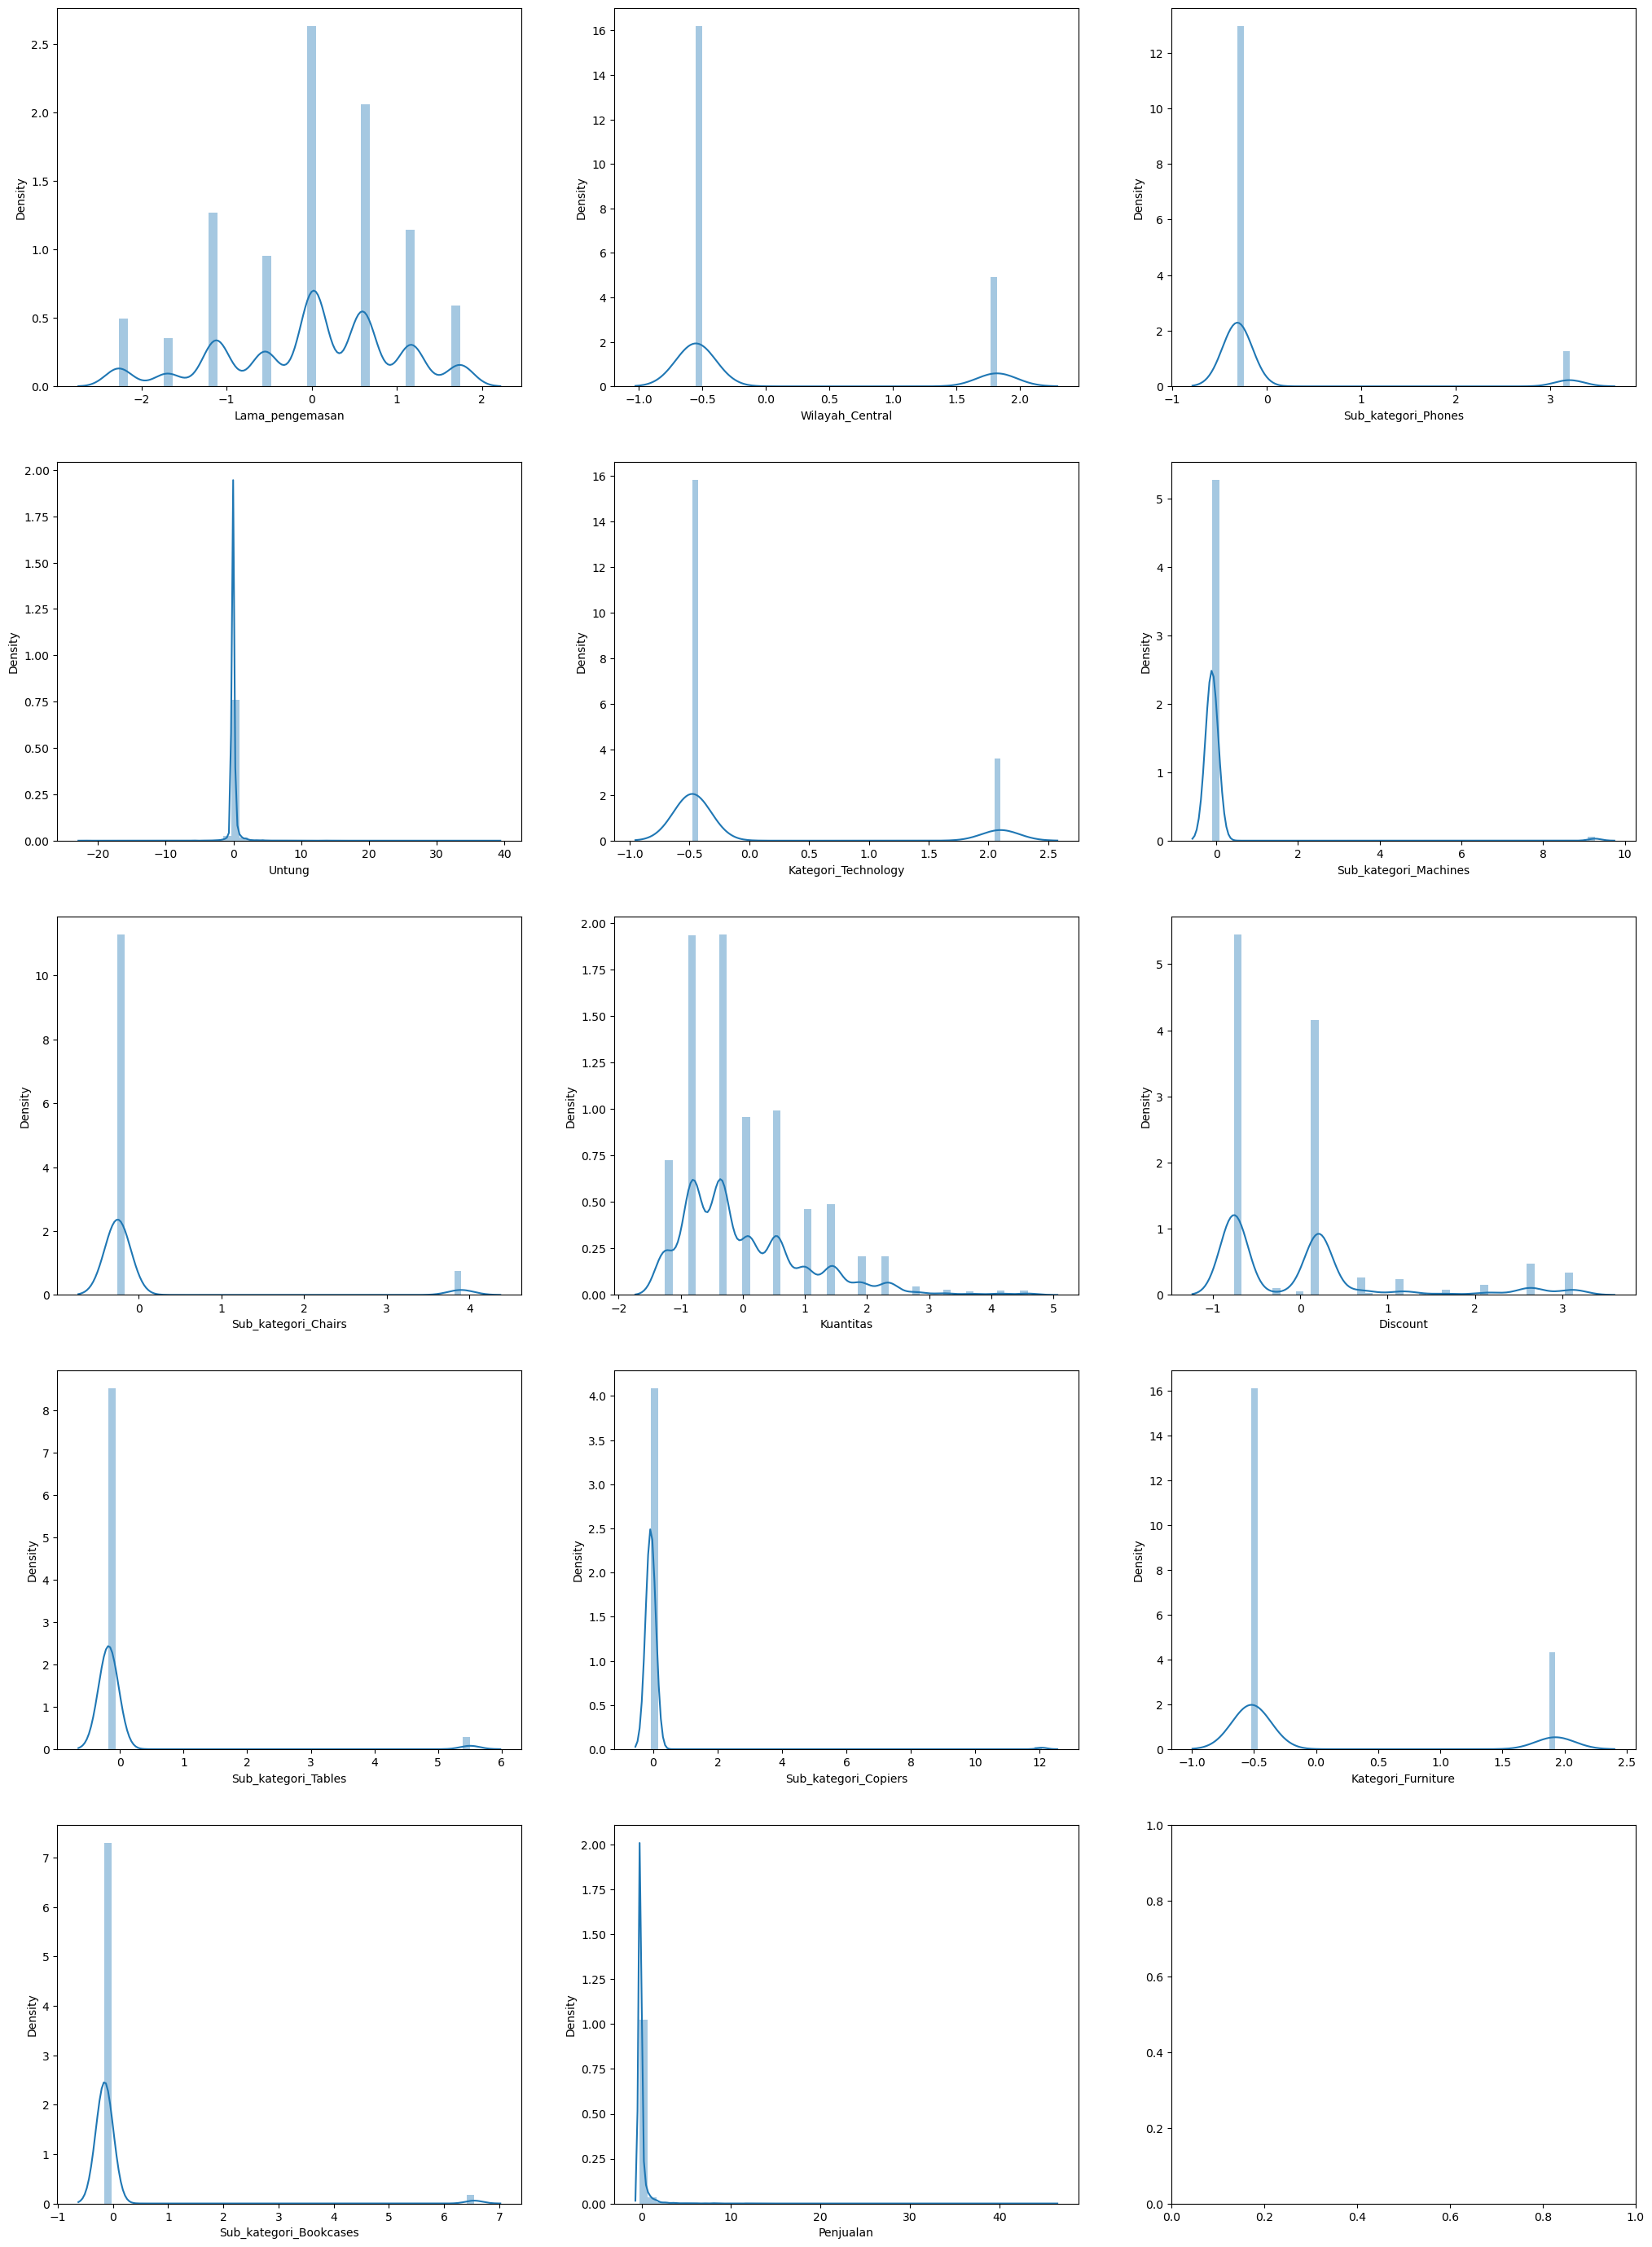

In [49]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(5, 3, figsize=(25, 35))

sns.distplot(scaled_data["Lama_pengemasan"], ax=axes[0, 0])
sns.distplot(scaled_data["Wilayah_Central"], ax=axes[0, 1])
sns.distplot(scaled_data["Sub_kategori_Phones"], ax=axes[0, 2])
sns.distplot(scaled_data["Untung"], ax=axes[1, 0])
sns.distplot(scaled_data["Kategori_Technology"], ax=axes[1, 1])
sns.distplot(scaled_data["Sub_kategori_Machines"], ax=axes[1, 2])
sns.distplot(scaled_data["Sub_kategori_Chairs"], ax=axes[2, 0])
sns.distplot(scaled_data["Kuantitas"], ax=axes[2, 1])
sns.distplot(scaled_data["Discount"], ax=axes[2, 2])
sns.distplot(scaled_data["Sub_kategori_Tables"], ax=axes[3, 0])
sns.distplot(scaled_data["Sub_kategori_Copiers"], ax=axes[3, 1])
sns.distplot(scaled_data["Kategori_Furniture"], ax=axes[3, 2])
sns.distplot(scaled_data["Sub_kategori_Bookcases"], ax=axes[4, 0])
sns.distplot(scaled_data["Penjualan"], ax=axes[4, 1])

plt.show()

Dari histogram di atas, diketahui bahwa variabel y dan X tidak berdistribusi normal.

Uji Normalitas dengan Shapiro-Wilk

H0 : Data berdistribusi normal <br> H1 : Data tidak berdistribusi normal

In [50]:
# Cek Normalitas dengan Uji Shapiro-Wilk
column = scaled_data.columns

for i in column:
    stat, p = shapiro(df[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # Pengujian Hipotesis
    alpha = 0.05
    if p > alpha:
        print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
    else:
        print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.943, p=0.000
Tolak H0, Lama_pengemasan tidak berdistribusi normal
Statistics=0.523, p=0.000
Tolak H0, Wilayah_Central tidak berdistribusi normal
Statistics=0.320, p=0.000
Tolak H0, Sub_kategori_Phones tidak berdistribusi normal
Statistics=0.214, p=0.000
Tolak H0, Untung tidak berdistribusi normal
Statistics=0.472, p=0.000
Tolak H0, Kategori_Technology tidak berdistribusi normal
Statistics=0.080, p=0.000
Tolak H0, Sub_kategori_Machines tidak berdistribusi normal
Statistics=0.256, p=0.000
Tolak H0, Sub_kategori_Chairs tidak berdistribusi normal
Statistics=0.882, p=0.000
Tolak H0, Kuantitas tidak berdistribusi normal
Statistics=0.711, p=0.000
Tolak H0, Discount tidak berdistribusi normal
Statistics=0.166, p=0.000
Tolak H0, Sub_kategori_Tables tidak berdistribusi normal
Statistics=0.053, p=0.000
Tolak H0, Sub_kategori_Copiers tidak berdistribusi normal
Statistics=0.503, p=0.000
Tolak H0, Kategori_Furniture tidak berdistribusi normal
Statistics=0.131, p=0.000
Tolak H0, Sub_kate

Pengujian normalitas dengan Shapiro-Wilk juga menunjukkan bahwa variabel y dan X tidak berdistribusi normal.

#### Uji Linearitas
adalah sifat hubungan yang linear antara variabel, artinya setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya.

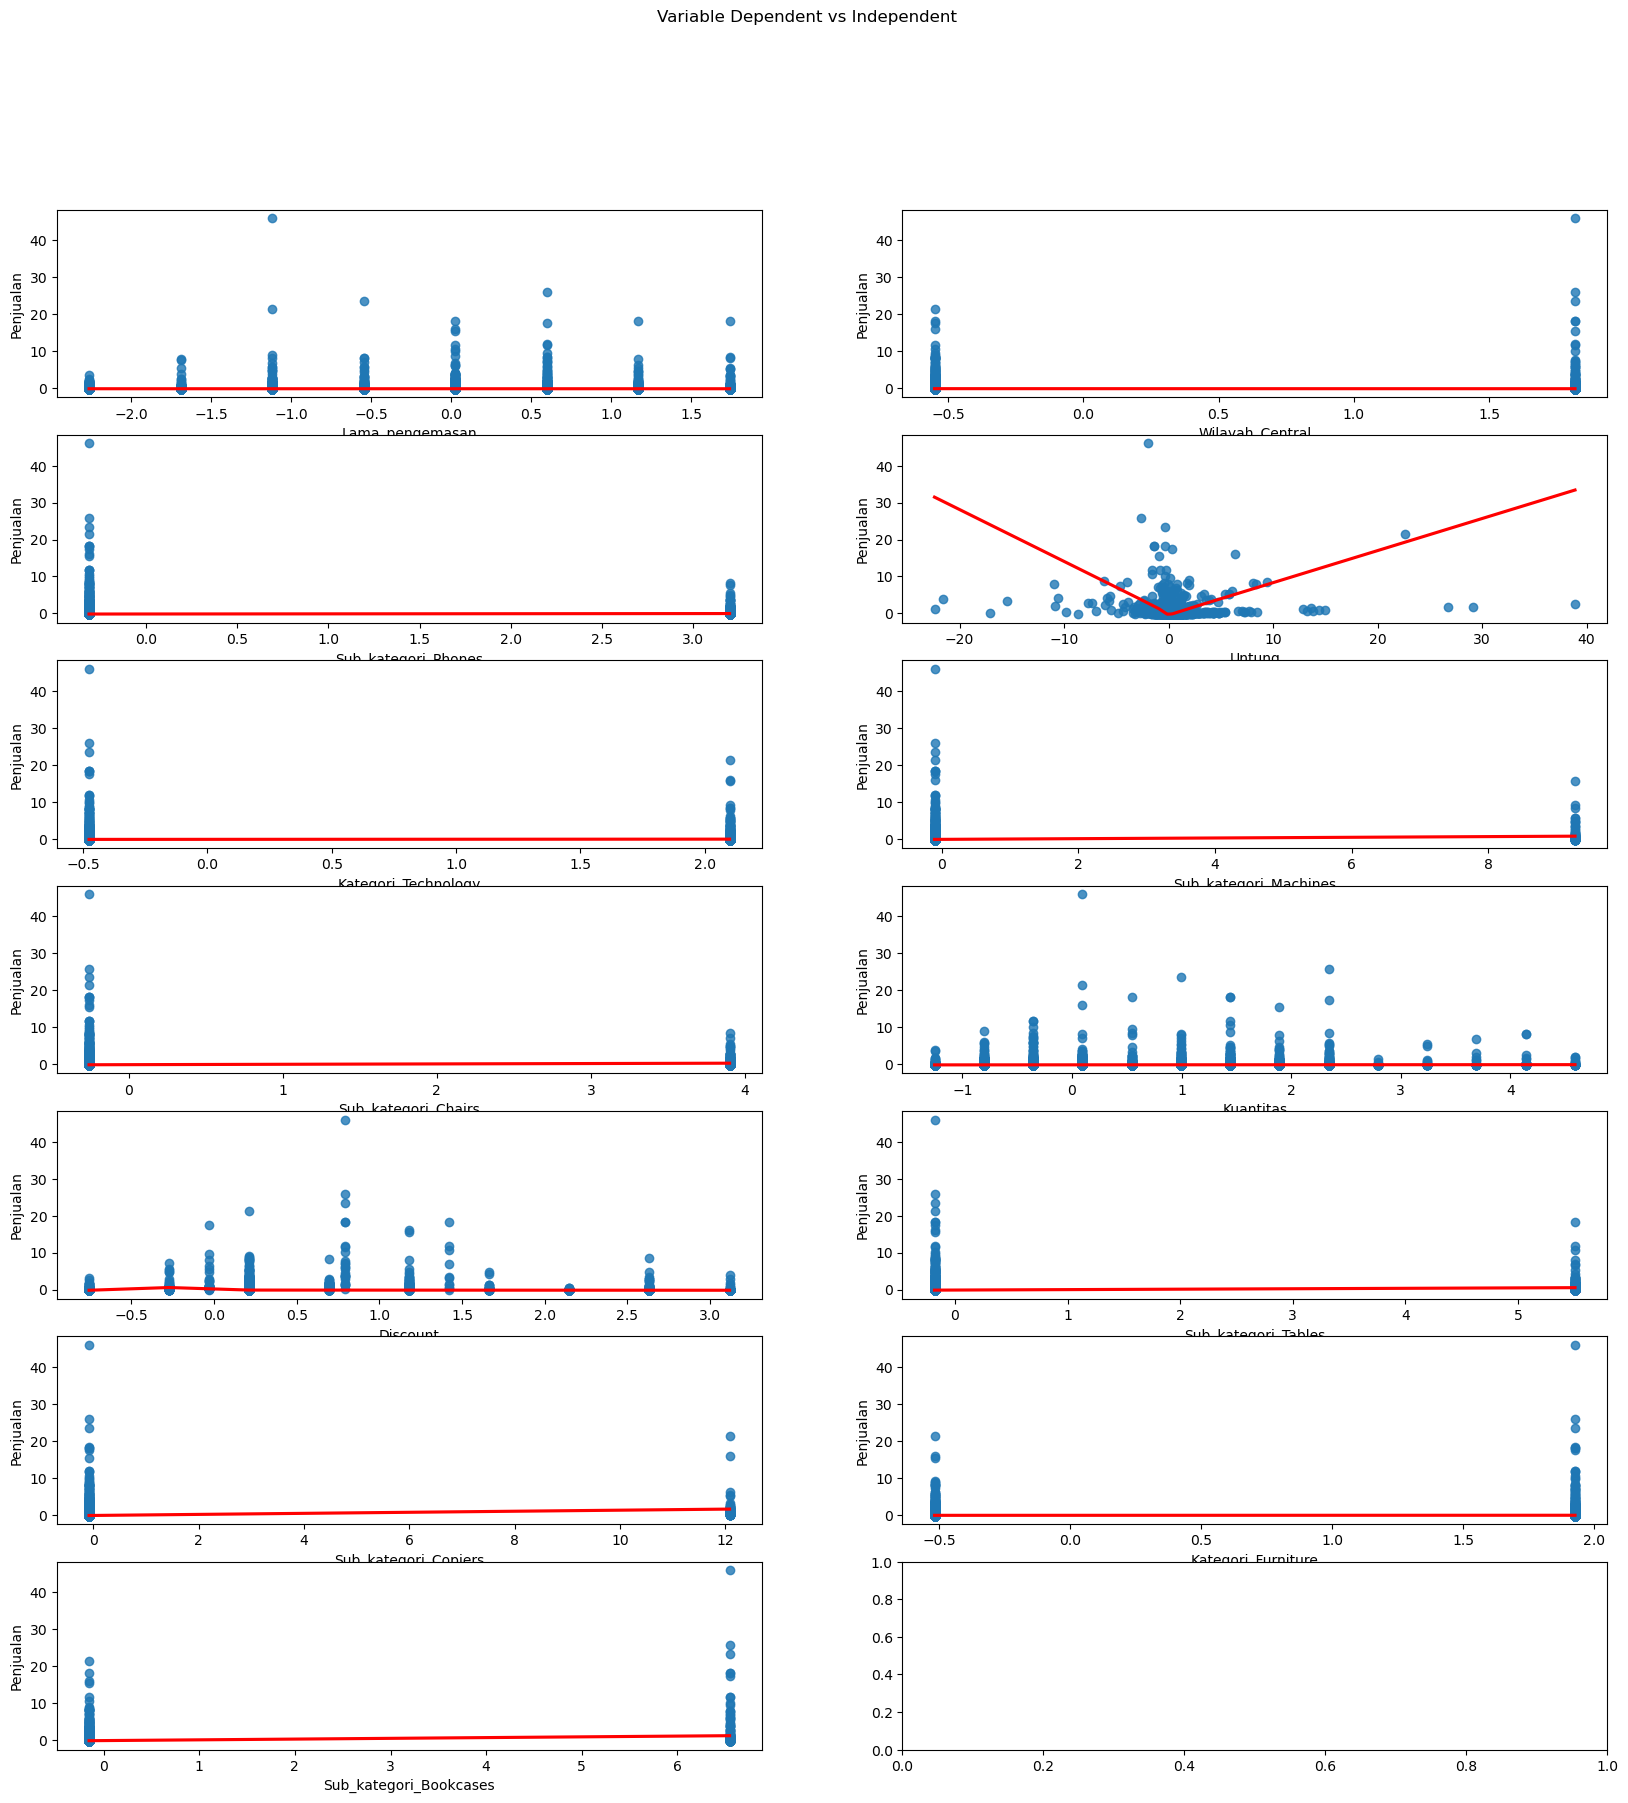

In [51]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(7, 2, figsize=(20, 20))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=scaled_data["Lama_pengemasan"], y=scaled_data["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[0, 0])
sns.regplot(x=scaled_data["Wilayah_Central"], y=scaled_data["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[0, 1])
sns.regplot(x=scaled_data["Sub_kategori_Phones"], y=scaled_data["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[1, 0])
sns.regplot(x=scaled_data["Untung"], y=scaled_data["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[1, 1])
sns.regplot(x=scaled_data["Kategori_Technology"], y=scaled_data["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[2, 0])
sns.regplot(x=scaled_data["Sub_kategori_Machines"], y=scaled_data["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[2, 1])
sns.regplot(x=scaled_data["Sub_kategori_Chairs"], y=scaled_data["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[3, 0])
sns.regplot(x=scaled_data["Kuantitas"], y=scaled_data["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[3, 1])
sns.regplot(x=scaled_data["Discount"], y=scaled_data["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[4, 0])
sns.regplot(x=scaled_data["Sub_kategori_Tables"], y=scaled_data["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[4, 1])
sns.regplot(x=scaled_data["Sub_kategori_Copiers"], y=scaled_data["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[5, 0])
sns.regplot(x=scaled_data["Kategori_Furniture"], y=scaled_data["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[5, 1])
sns.regplot(x=scaled_data["Sub_kategori_Bookcases"], y=scaled_data["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[6, 0])

plt.show()

#### Uji Multikolinearitas
Untuk melihat ada atau tidaknya korelasi yang tinggi antara variabel-variabel bebas dalam model regresi linear berganda

<Axes: >

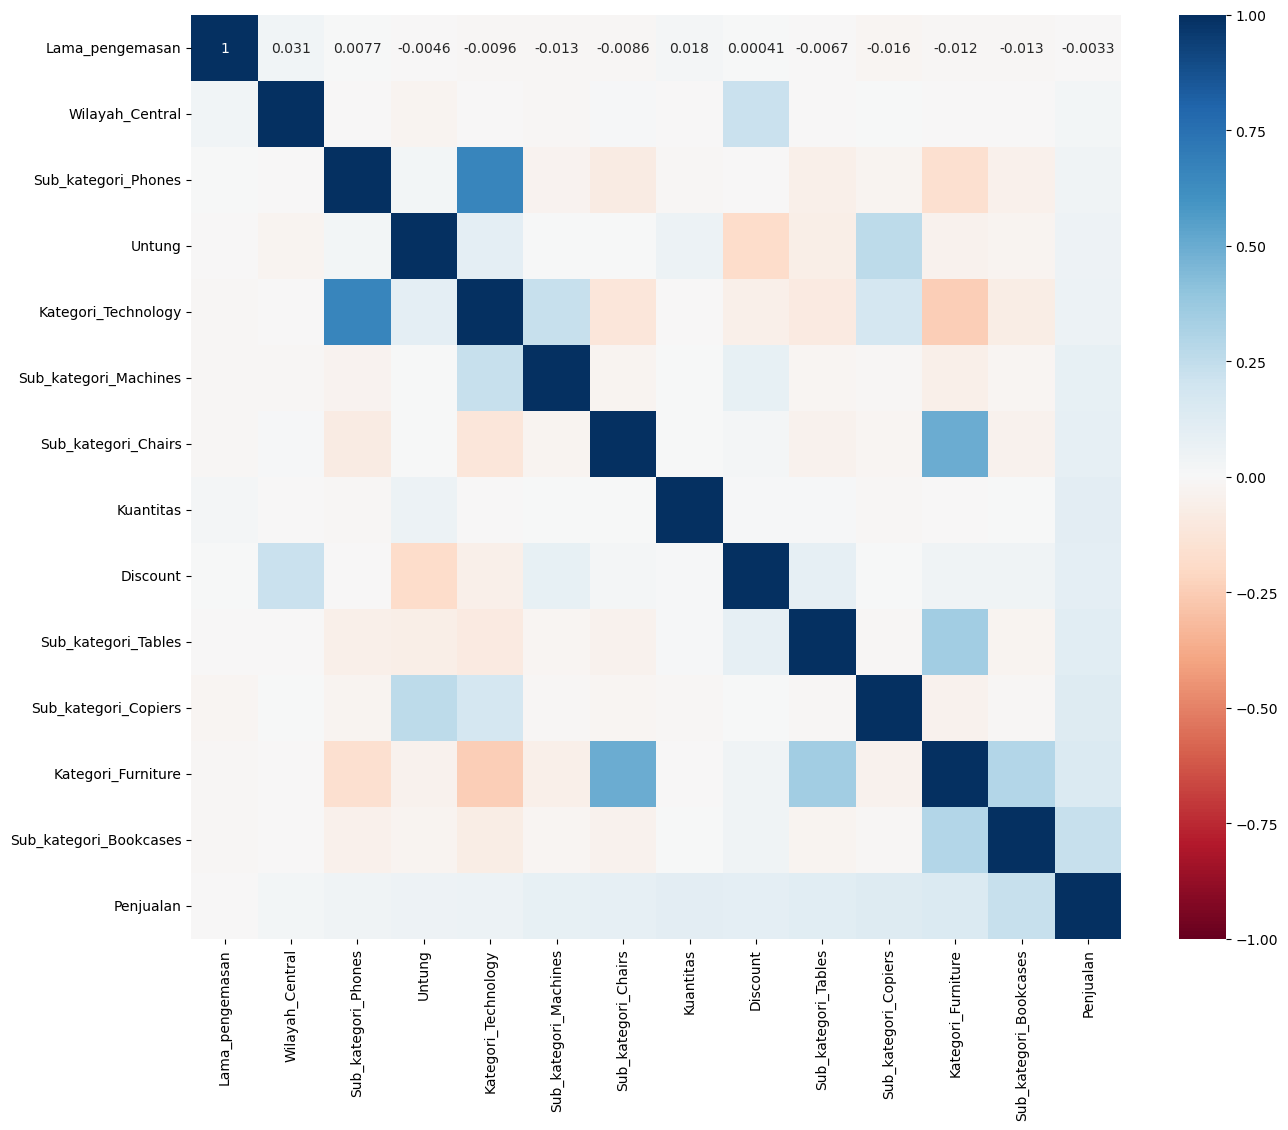

In [52]:
plt.figure(figsize=(15,12))
sns.heatmap(scaled_data.corr(), vmax=1, vmin=-1, center=0, cmap="RdBu", annot=True)

In [53]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = scaled_data.corr()["Penjualan"].sort_values()
korelasi

Lama_pengemasan          -0.003268
Wilayah_Central           0.026647
Sub_kategori_Phones       0.041123
Untung                    0.050876
Kategori_Technology       0.057504
Sub_kategori_Machines     0.083948
Sub_kategori_Chairs       0.091096
Discount                  0.096191
Kuantitas                 0.107960
Sub_kategori_Tables       0.111297
Sub_kategori_Copiers      0.131683
Kategori_Furniture        0.146866
Sub_kategori_Bookcases    0.228369
Penjualan                 1.000000
Name: Penjualan, dtype: float64

Nilai korelasi yang diperoleh antar variabel bebas relatif kecil, sehingga asumsi terpenuhi.

### MODELING

#### Train test Split
Proses pembagian data dalam bentuk train (Untuk membangun model) dan test(untuk testing model yang terbentuk) dengan pembagian 70% data train dan 30% data test.

In [54]:
X = scaled_data.drop("Penjualan", axis=1).values
y = scaled_data["Penjualan"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  6995
Ukuran X test  2999
Ukuran y train  6995
Ukuran y test  2999


#### Membangun model dengan Statsmodels (Logistics Regression)

In [55]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [56]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [57]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     73.60
Date:                Thu, 09 May 2024   Prob (F-statistic):          1.86e-183
Time:                        18:59:23   Log-Likelihood:                -9379.7
No. Observations:                6995   AIC:                         1.879e+04
Df Residuals:                    6981   BIC:                         1.888e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.011     -0.012      0.9

Dari output diatas, kita dapat mengetahui nilai-nilai :

Nilai p>|t| = 0,000 kurang dari 0,05 pada variabel x3, x4, x6, x7, x8, x9, x10, x11 dan x13 artinya kesembilan variabel independen tersebut memberikan pengaruh secara signifikan terhadap variabel dependen. Nilai p>|t| lebih dari 0,05 pada variabel x1 (0,947), x2 (0,263), x5 (0,413), dan x12 (0,681) artinya keempat variabel tersebut tidak memberikan pengaruh yang signifikan terhadap variabel dependen. Tetapi Nilai p>|t| intercept sebesar 0.990 yang berarti intercept tidak berpengaruh signifikan terhadap model dan garis regresi melewati titik pusat (0,0) oleh karena itu intercept atau konstanta boleh dihilangkan dari model.

Nilai coef-x1 0,0007 artinya besarnya pengaruh variabel independen Lama_pengemasan 0,0007 poin, pada kasus ini jika nilai Lama_pengemasan bertambah satu poin maka nilai Penjualan bertambah 0,0007.

Nilai coef-x2 0,0128 artinya besarnya pengaruh variabel independen Wilayah_Central 0,0128 poin, pada kasus ini jika nilai WIlayah_Central bertambah satu poin maka nilai Penjualan bertambah 0,0128.

Nilai coef-x3 0,0625 artinya besarnya pengaruh variabel independen Sub_kategori_Phones 0,0625 poin, pada kasus ini jika nilai Sub_kategori_Phones bertambah satu poin maka nilai Penjualan bertambah 0,0625.

Nilai coef-x4 0,0706 artinya besarnya pengaruh variabel independen Untung 0,0706 poin, pada kasus ini jika nilai Untung bertambah satu poin maka nilai Penjualan bertambah 0,0706.

Nilai coef-x5 0,0133 artinya besarnya pengaruh variabel independen Kategori_Technology 0,0133 poin, pada kasus ini jika nilai Kategori_Technology bertambah satu poin maka nilai Penjualan bertambah 0,0133.

Nilai coef-x6 0,1073 artinya besarnya pengaruh variabel independen Sub_kategori_Machines 0,1073 poin, pada kasus ini jika nilai Sub_kategori_Machines bertambah satu poin maka nilai Penjualan bertambah 0,1073.

Nilai coef-x7 0,1242 artinya besarnya pengaruh variabel independen Sub_kategori_Chairs 0,1242 poin, pada kasus ini jika nilai Sub_kategori_Chairs bertambah satu poin maka nilai Penjualan bertambah 0,1242.

Nilai coef-x8 0,0866 artinya besarnya pengaruh variabel independen Discount 0,0866 poin, pada kasus ini jika nilai Discount bertambah satu poin maka nilai Penjualan bertambah 0,0866.

Nilai coef-x9 0,0766 artinya besarnya pengaruh variabel independen Kuantitas 0,0766 poin, pada kasus ini jika nilai Kuantitas bertambah satu poin maka nilai Penjualan bertambah 0,0766.

Nilai coef-x10 0,1210 artinya besarnya pengaruh variabel independen Sub_kategori_Tables 0,1210 poin, pada kasus ini jika nilai Sub_kategori_Tables bertambah satu poin maka nilai Penjualan bertambah 0,1210.

Nilai coef-x11 0,1337 artinya besarnya pengaruh variabel independen Sub_kategori_Copiers 0,1337 poin, pada kasus ini jika nilai Sub_kategori_Copiers bertambah satu poin maka nilai Penjualan bertambah 0,1337.

Nilai coef-x12 -0,0065 artinya variabel independen Kategori_Furniture memiliki pengaruh negatif terhadap variabel dependen Penjualan. pada kasus ini jika nilai Kategori_Furniture bertambah satu poin maka nilai Penjualan menurun 0,0065.

Nilai coef-x13 0,2066 artinya besarnya pengaruh variabel independen Sub_kategori_Bookcases 0,2066 poin, pada kasus ini jika nilai Sub_kategori_Bookcases bertambah satu poin maka nilai Penjualan bertambah 0,2066.


Nilai R-Squared 0,121 artinya variabel dependen Penjualan hanya dapat dijelaskan oleh ketigabelas variabel independen sebesar 12%, kemampuan ketigabelas variabel dalam menjelaskan variabel dependen Penjualan tergolong lemah.

Nilai AIC 1,879 dan BIC 1,888. nilai ini dapat digunakan ketika dalam analisis regresi menghasilkan beberapa model, dan dijadikan acuan untuk memilih model mana yang terbaik dengan melihat nilai AIC dan BIC yang terkecil.

In [58]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.12053819210569727
adjusted coefficient of determination: 0.11890046061986059
regression coefficients: [-1.36474706e-04  7.35414963e-04  1.27868789e-02  6.24837896e-02
  7.05784343e-02  1.33441848e-02  1.07340546e-01  1.24165454e-01
  8.65996571e-02  7.65610785e-02  1.20973734e-01  1.33731179e-01
 -6.52562323e-03  2.06636152e-01]


In [59]:
# membuat list
list_columns = []

for i in scaled_data.columns:
  if i != "Penjualan":
    list_columns.append(i)

In [60]:
list_columns

['Lama_pengemasan',
 'Wilayah_Central',
 'Sub_kategori_Phones',
 'Untung',
 'Kategori_Technology',
 'Sub_kategori_Machines',
 'Sub_kategori_Chairs',
 'Kuantitas',
 'Discount',
 'Sub_kategori_Tables',
 'Sub_kategori_Copiers',
 'Kategori_Furniture',
 'Sub_kategori_Bookcases']

In [61]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["Aktual_penjualan"] = y_test
df_statsmod["Prediksi_penjualan"] = prediction_1
df_statsmod.head()

,Lama_pengemasan,Wilayah_Central,Sub_kategori_Phones,Untung,Kategori_Technology,Sub_kategori_Machines,Sub_kategori_Chairs,Kuantitas,Discount,Sub_kategori_Tables,Sub_kategori_Copiers,Kategori_Furniture,Sub_kategori_Bookcases,Aktual_penjualan,Prediksi_penjualan
0,1.740693,-0.550299,-0.312472,-0.103854,-0.47614,-0.107893,-0.256514,-0.804303,-0.756643,-0.181581,-0.082769,-0.519039,-0.152795,-0.213830,-0.271335
1,-2.265077,-0.550299,-0.312472,-0.047976,-0.47614,-0.107893,-0.256514,-0.804303,-0.756643,-0.181581,-0.082769,-0.519039,-0.152795,-0.213965,-0.270338
2,0.023935,-0.550299,-0.312472,-0.089205,-0.47614,-0.107893,-0.256514,-1.253742,0.212153,-0.181581,-0.082769,-0.519039,-0.152795,-0.150443,-0.236313
3,1.168440,-0.550299,-0.312472,-0.094232,-0.47614,-0.107893,3.898427,0.544012,0.212153,-0.181581,-0.082769,1.926637,-0.152795,-0.163586,0.419799
4,0.023935,1.817194,-0.312472,-0.067136,-0.47614,-0.107893,-0.256514,0.993451,0.212153,-0.181581,-0.082769,-0.519039,-0.152795,-0.180108,-0.009877


#### Uji distribusi residual

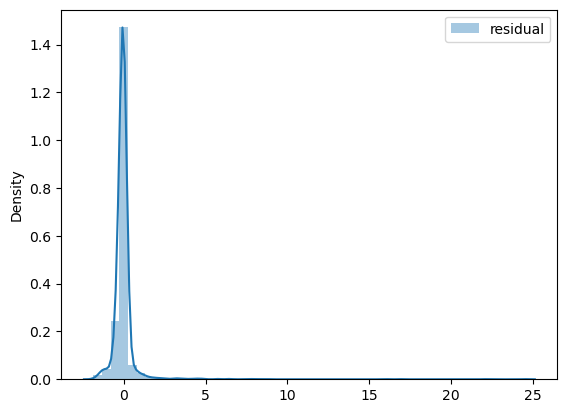

In [62]:
# Melihat distribusi residual
residual1 = df_statsmod['Aktual_penjualan'] - df_statsmod['Prediksi_penjualan']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [63]:
# Uji Normalitas pada Residual
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.271, p=0.000
Tolak H0, residual tidak berdistribusi normal


dapat disimpulkan bahwa residual tidak berdistribusi normal.

In [64]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,Lama_pengemasan,Wilayah_Central,Sub_kategori_Phones,Untung,Kategori_Technology,Sub_kategori_Machines,Sub_kategori_Chairs,Kuantitas,Discount,Sub_kategori_Tables,Sub_kategori_Copiers,Kategori_Furniture,Sub_kategori_Bookcases,Aktual_penjualan,Prediksi_penjualan,residual
0,1.740693,-0.550299,-0.312472,-0.103854,-0.47614,-0.107893,-0.256514,-0.804303,-0.756643,-0.181581,-0.082769,-0.519039,-0.152795,-0.213830,-0.271335,0.057506
1,-2.265077,-0.550299,-0.312472,-0.047976,-0.47614,-0.107893,-0.256514,-0.804303,-0.756643,-0.181581,-0.082769,-0.519039,-0.152795,-0.213965,-0.270338,0.056373
2,0.023935,-0.550299,-0.312472,-0.089205,-0.47614,-0.107893,-0.256514,-1.253742,0.212153,-0.181581,-0.082769,-0.519039,-0.152795,-0.150443,-0.236313,0.085870
3,1.168440,-0.550299,-0.312472,-0.094232,-0.47614,-0.107893,3.898427,0.544012,0.212153,-0.181581,-0.082769,1.926637,-0.152795,-0.163586,0.419799,-0.583386
4,0.023935,1.817194,-0.312472,-0.067136,-0.47614,-0.107893,-0.256514,0.993451,0.212153,-0.181581,-0.082769,-0.519039,-0.152795,-0.180108,-0.009877,-0.170231


Plot data actual dan prediction<br>
Untuk membandingkan hasil data prediksi dengan data yang asli (actual), dapat dibentuk menjadi plot berikut :

<function matplotlib.pyplot.show(close=None, block=None)>

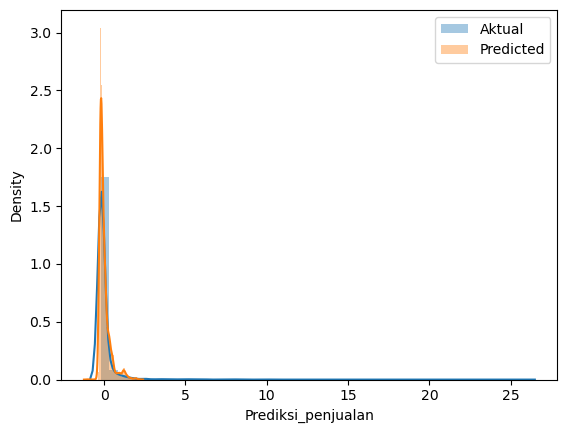

In [65]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['Aktual_penjualan'], label="Aktual")
sns.distplot(df_statsmod['Prediksi_penjualan'], label="Predicted")
plt.legend()
plt.show

#### Uji autokorelasi 
untuk melihat apakah terjadi korelasi antara suatu periode t dengan periode sebelumnya (t-1) dengan cara melihat Durbin-Watson.

In [66]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

2.0106102954364133

Skor Durbin-Watson antara 1,5 dan 2,5 maka tidak ada autokorelasi dan asumsi puas.

#### Uji Homoskedasitas
untuk melihat apakah terdapat ketidaksamaan varians dari residual satu ke pengamatan-pengamatan yang lain.

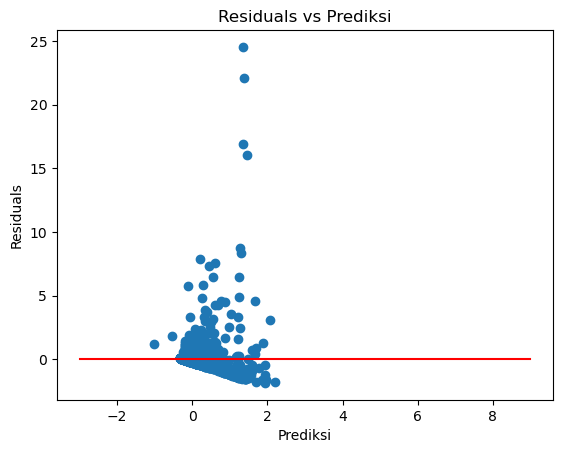

In [67]:
asm_homosk = plt.scatter(df_statsmod['Prediksi_penjualan'], df_statsmod["residual"])
x_data = [-3, 9]  
y_data = [0, 0]  

asm_homosk = sns.lineplot(x=x_data, y=y_data, color='red')  # Pass data as keyword arguments
plt.xlabel('Prediksi')  # Label for x-axis
plt.ylabel('Residuals')  # Label for y-axis
plt.title('Residuals vs Prediksi')  # Plot title
plt.show()

Dari visualisasi diatas terlihat bahwa data berkumpul dalam satu pusat sehingga dapat dikatakan homoskedasitas terpenuhi.

### EVALUATION

In [68]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['Aktual_penjualan'], df_statsmod['Prediksi_penjualan']))

R-square : 0.13375027597014577


In [69]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['Aktual_penjualan'], df_statsmod['Prediksi_penjualan']))

MSE : 0.9212320858666294


#### Uji Partial Analisis Regresi Uji Parameter T-test 
memiliki tujuan, apakah variabel independent(X) memberikan pengaruh secara partial terhadap variabel dependent (Y)

In [70]:
t_test_const, t_test_X1, t_test_X2, t_test_X3, t_test_X4, t_test_X5, t_test_X6, t_test_X7, t_test_X8, t_test_X9, t_test_X10, t_test_X11, t_test_X12, t_test_X13 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)
print("T-test score X3: ", t_test_X3)
print("T-test score X4: ", t_test_X4)
print("T-test score X5: ", t_test_X5)
print("T-test score X6: ", t_test_X6)
print("T-test score X7: ", t_test_X7)
print("T-test score X8: ", t_test_X8)
print("T-test score X9: ", t_test_X9)
print("T-test score X10: ", t_test_X10)
print("T-test score X11: ", t_test_X11)
print("T-test score X12: ", t_test_X12)
print("T-test score X13: ", t_test_X13)

T-test score const:  -0.012323023465707373
T-test score X1:  0.06639747449029296
T-test score X2:  1.1193598791831936
T-test score X3:  4.087963566531289
T-test score X4:  5.967577749541885
T-test score X5:  0.8186736131824026
T-test score X6:  8.41598579011079
T-test score X7:  8.919933633612358
T-test score X8:  7.661889105657006
T-test score X9:  6.543250341649493
T-test score X10:  9.625872152126485
T-test score X11:  11.0410034975906
T-test score X12:  -0.41066027115341824
T-test score X13:  16.963824692941824


In [71]:
p_value_const, p_value_X1, p_value_X2, p_value_X3, p_value_X4, p_value_X5, p_value_X6, p_value_X7, p_value_X8, p_value_X9, p_value_X10, p_value_X11, p_value_X12, p_value_X13 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)
print("P-value X3: ", p_value_X3)
print("P-value X4: ", p_value_X4)
print("P-value X5: ", p_value_X5)
print("P-value X6: ", p_value_X6)
print("P-value X7: ", p_value_X7)
print("P-value X8: ", p_value_X8)
print("P-value X9: ", p_value_X9)
print("P-value X10: ", p_value_X10)
print("P-value X11: ", p_value_X11)
print("P-value X12: ", p_value_X12)
print("P-value X13: ", p_value_X13)

P-value const:  0.9901682508118652
P-value X1:  0.9470632821705403
P-value X2:  0.2630251515193593
P-value X3:  4.400588218893328e-05
P-value X4:  2.5258576798384014e-09
P-value X5:  0.4130005998065279
P-value X6:  4.6806056647820747e-17
P-value X7:  5.875951284393298e-19
P-value X8:  2.0800415358226487e-14
P-value X9:  6.445768050057272e-11
P-value X10:  8.48860831579675e-22
P-value X11:  4.136041626952772e-28
P-value X12:  0.6813342661149793
P-value X13:  2.7832040191538057e-63


Diperoleh dari output diatas, bahwa P-value pada variabel x3, x4, x6, x7, x8, x9, x10, x11, dan x13 memiliki p-value kurang dari 0,05 yang artinya bahwa kesembilan variabel independen tersebut memberikan pengaruh secara signifikan pada variabel dependen Penjualan (Y).

Variabel x1, x2, x5, dan x12 memiliki p-value lebih besar dari 0,05 yang artinya keempat variabel independen tersebut tidak memberikan pengaruh yang signifikan terhadap variabel dependen Penjualan.

#### Uji kelayakan model F-test 
memilki tujuan, apakah model yang dibentuk layak digunakan atau tidak.

In [72]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  73.60070509001433
P-value :  1.8597914323417284e-183
Tolak H0


Dari output diatas, diperoleh p-value kurang dari 0,05 sehingga hypothesis null ditolak dan dapat disimpulkan bahwa model regresi dari ketigabelas variabel independen dan variabel dependen Penjualan (Y) layak digunakan.

### LOAD AND PREDICT NEW DATA

In [73]:
# Dataframe predisksi model dengan data testing dan residual
df_statsmod.head()

,Lama_pengemasan,Wilayah_Central,Sub_kategori_Phones,Untung,Kategori_Technology,Sub_kategori_Machines,Sub_kategori_Chairs,Kuantitas,Discount,Sub_kategori_Tables,Sub_kategori_Copiers,Kategori_Furniture,Sub_kategori_Bookcases,Aktual_penjualan,Prediksi_penjualan,residual
0,1.740693,-0.550299,-0.312472,-0.103854,-0.47614,-0.107893,-0.256514,-0.804303,-0.756643,-0.181581,-0.082769,-0.519039,-0.152795,-0.213830,-0.271335,0.057506
1,-2.265077,-0.550299,-0.312472,-0.047976,-0.47614,-0.107893,-0.256514,-0.804303,-0.756643,-0.181581,-0.082769,-0.519039,-0.152795,-0.213965,-0.270338,0.056373
2,0.023935,-0.550299,-0.312472,-0.089205,-0.47614,-0.107893,-0.256514,-1.253742,0.212153,-0.181581,-0.082769,-0.519039,-0.152795,-0.150443,-0.236313,0.085870
3,1.168440,-0.550299,-0.312472,-0.094232,-0.47614,-0.107893,3.898427,0.544012,0.212153,-0.181581,-0.082769,1.926637,-0.152795,-0.163586,0.419799,-0.583386
4,0.023935,1.817194,-0.312472,-0.067136,-0.47614,-0.107893,-0.256514,0.993451,0.212153,-0.181581,-0.082769,-0.519039,-0.152795,-0.180108,-0.009877,-0.170231


### KESIMPULAN/SARAN

Model regresi dengan 13 variabel independen (X) dan variabel dependen Penjualan (Y) layak untuk digunakan karena menunjukkan hubungan yang signifikan (dengan bukti P-value kurang dari 0,05). Namun model ini memiliki keterbatasan yang terlihat dari nilai R-Square yang rendah (13%) menunjukkan bahwa sebagian besar variasi Penjualan masih belum dapat dijelaskan oleh model. Selain itu, hasil uji normalitas pada residual menunjukkan bahwa asumsi normalitas dilanggar.

Jika memakai metode regresi robust (Huber Regression dan RLM) hasilnya masih sama saja. Maka dari itu dibutuhkan analisis lebih lanjut lagi untuk memastikan kesesuaian model dan mengatasi masalah ketidaknormalan residual.

Dari analisis data diatas, didapatkan beberapa cara untuk mengembangkan revenue optimization (optimalisasi pendapatan) yang efektif untuk perusahaan Superstore yaitu : 
1. Fokus pada wilayah dan Negara dengan konsentrasi Customer yang tinggi seperti wilayah West dan East. 

2. Meningkatkan strategi marketing untuk menjangkau lebih banyak customer diwilayah dan negara dengan tingkat penjualan rendah.

3.  Mempercepat waktu pemrosesan pesanan customer dengan meningkatkan efisiensi operasional dan menggunakan teknologi yang lebih canggih.

4. Memperkuat strategi untuk segmen pelanggan "Consumer" dengan mengembangkan program loyalitas dan promo khusus untuk customer individual. Hal tersebut dapat meningkatkan customer engagement.

5. Meningkatkan keuntungan produk kategori Furniture dengan cara melakukan riset pasar dan tren terkait produk Furniture agar dapat mengembangkan produk Furniture yang inovatif dan sesuai dengan kebutuhan customer.

Apa saja wawasan bisnis yang dapat digunakan untuk  meningkatkan kinerja perusahaan Superstore?
1. Data penjualan dan keuntungan dapat membantu perusahaan Superstore untuk mengidentifikasi produk, kategori, wilayah dan segmen customer yang paling menguntungkan. Hal ini dapat membantu Superstore dalam mengalokasikan sumber daya secara lebih efektif dan meningkatkan revenue.

2. Tren pasar dan perilaku consumer dapat membantu Superstore dalam mengembangkan produk dan layanan baru yang sesuai dengan kebutuhan customer. Hal ini dapat meningkatkan customer satisfaction dan mendorong customer untuk berbelanja lebih banyak.

Superstore harus terus melakukan riset pasar dan menganalisis data untuk memahami kebutuhan customer dan menyesuaikan strateginya dengan kondisi pasar yang terus berubah. 
Dengan menerapkan strategi revenue optimization yang tepat dan menggunakan wawasan bisnis yang tersedia, Superstore dapat meningkatkan kinerjanya dan mencapai kesuksesan yang lebih besar di masa depan. 